In [1]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
d = pd.read_csv('../data/ashton_15_notalk.csv')
d.head()

,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,time,tag
0,2873836,2300583,5579513,1298763,4051950,5422231,4853786,5297074,1.460000e+09,0
1,2872616,2299698,5579250,1298037,4050966,5421842,4853341,5296371,1.460000e+09,0
2,2872371,2299664,5579475,1298221,4050618,5422072,4853474,5296524,1.460000e+09,0
3,2875512,2301487,5580609,1298798,4052374,5423274,4855124,5297380,1.460000e+09,0
4,2875132,2301278,5580168,1299394,4052719,5423073,4854885,5297751,1.460000e+09,0


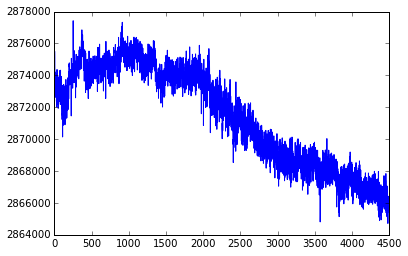

In [3]:
plt.plot(d.channel_0)

In [4]:
# b, a = signal.butter(5, (8.0/125.0, 40.0/125), btype='bandpass')

x = d.channel_0.values
# sig_f = signal.lfilter(b, a, x)
# sig = sig_f[500:]
sig = x

In [5]:
# freq, y = signal.welch(sig, fs=250.0)
fft = np.log(np.abs(np.fft.rfft(sig)))
fftfreq = np.fft.rfftfreq(len(sig), d=1/250.0)

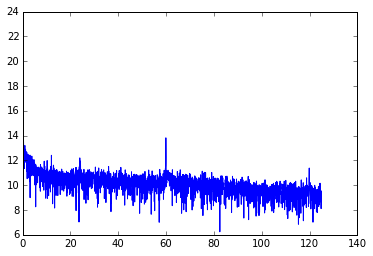

In [6]:
# plt.plot(freq, y)
plt.plot(fftfreq, fft)

In [7]:
fftfreq, fft = signal.welch(sig, fs=250.0)

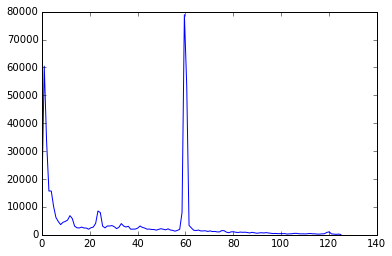

In [8]:
plt.plot(fftfreq, fft)

In [20]:
b, a = signal.butter(8, (6.5/125.0, 40.0/125), btype='bandpass')
sig_f = signal.lfilter(b, a, sig)[1000:]

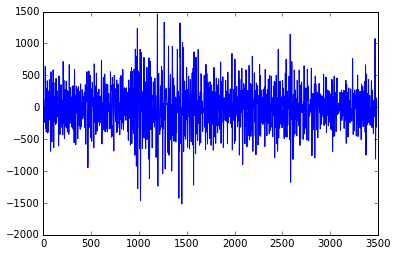

In [21]:
plt.plot(sig_f)


(5, 40)

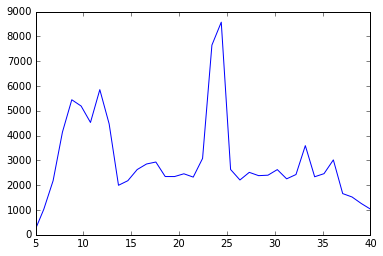

In [22]:
fftfreq, fft = signal.welch(sig_f, fs=250.0)
plt.plot(fftfreq, fft)
plt.xlim(5, 40)

(0, 8000)

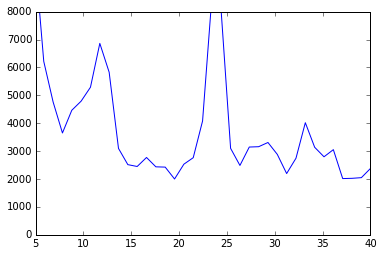

In [23]:
fftfreq, fft = signal.welch(sig, fs=250.0)
plt.plot(fftfreq, fft)
plt.xlim(5, 40)
plt.ylim(0, 8000)

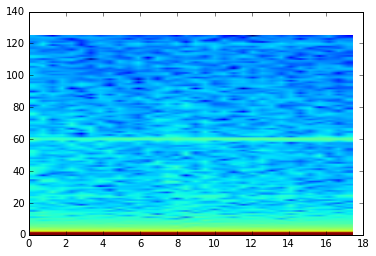

In [19]:
_ = plt.specgram(sig, Fs=250.0)

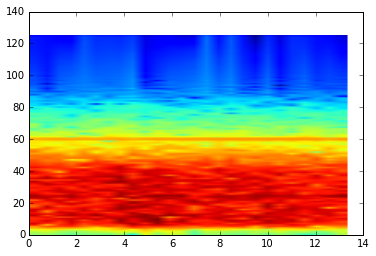

In [14]:
_ = plt.specgram(sig_f, Fs=250.0, NFFT=256, noverlap=128)